In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [73]:
data = pd.read_csv('D://DataScienceCollection//DataSets//Consumer_Complaints.csv', low_memory=False)
data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1114245,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,FL,32219.0,Web,11/13/2014,11/13/2014,"Choice Recovery, Inc.",Closed with explanation,Yes,NaN
1,1114488,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,75006.0,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,NaN
2,1114255,Bank account or service,Checking account,Deposits and withdrawals,NaN,NY,11102.0,Web,11/13/2014,11/13/2014,"FNIS (Fidelity National Information Services, ...",In progress,Yes,NaN
3,1115106,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,GA,31721.0,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,NaN
4,1115890,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,FL,33461.0,Web,11/12/2014,11/13/2014,TransUnion,In progress,Yes,NaN


In [74]:
data=data[['Product','Issue']]

In [75]:
data.head(5)

,Product,Issue
0,Debt collection,Disclosure verification of debt
1,Debt collection,Disclosure verification of debt
2,Bank account or service,Deposits and withdrawals
3,Debt collection,Communication tactics
4,Credit reporting,Incorrect information on credit report


In [76]:
data['Product'].unique()

array(['Debt collection', 'Bank account or service', 'Credit reporting',
       'Consumer loan', 'Mortgage', 'Credit card', 'Student loan',
       'Payday loan', 'Money transfers'], dtype=object)

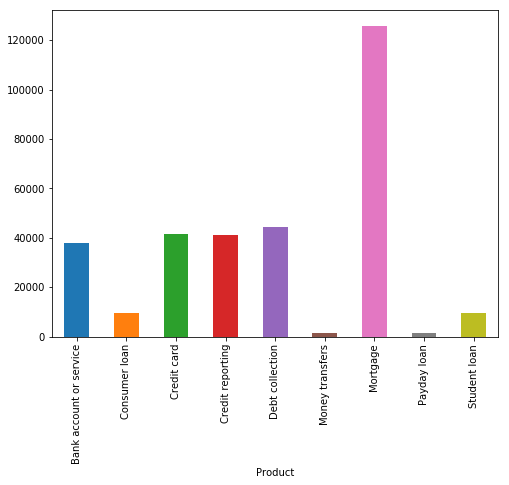

In [77]:
fig = plt.figure(figsize=(8,6))
data.groupby('Product').Issue.count().plot.bar(ylim=0)
plt.show()

In [78]:
#Understanding NULL values and sorting them !
Isnull=data.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

Issue      4
Product    0
dtype: int64


In [79]:
#There is no Null in our data :D

In [80]:
data['Issue']=data['Issue'].astype(str)

In [81]:
data=data[data['Issue'] != 'True']

In [82]:
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(data['Issue'])
pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())

,account,acct,action,advance,advertising,amount,amt,an,and,application,...,using,verification,was,when,with,withdrawals,workout,wrong,you,your
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.551556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.551556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.536445,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.596752,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.551556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(data['Issue'], data['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [86]:
print(clf.predict(count_vect.transform(["I do not Credit card."])))

['Credit card']
